In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os

from matplotlib import pyplot as plt
import numpy as np


In [ ]:
def simulate_experience(img_dir=None):
	# the image paths
	image_names = sorted(os.listdir(img_dir))

	for image_name in image_names:
		yield image_name

In [ ]:
img_dir = 'test/images'
image_names = simulate_experience(img_dir)
for i, image_name in enumerate(image_names):
    idx = image_name.split('.')[0]
    feature_map = np.loadtxt('results/feature_maps/feature_map_{}.txt'.format(idx))
    image = np.loadtxt('results/images/image_{}.txt'.format(idx))

    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 2
    rows = 1
    li = [0, image, feature_map]
    for i in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(idx)
        plt.imshow(li[i], cmap='gray')
    plt.show()

In [292]:
idx = "img_99c"
feature_map = np.loadtxt('results/feature_maps/feature_map_{}.txt'.format(idx))
image = np.loadtxt('results/images/image_{}.txt'.format(idx))

In [302]:
feature_map

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.12003111,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.1927    ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       

In [313]:
def loadtxt(idx, x='feature_map'):
    return np.loadtxt('results/{}s/{}_{}.txt'.format(x, x, idx))

def sim(a, b):
    return np.sqrt(np.sum(abs(a - b)**2))

In [354]:
img_dir = 'test/photos'
image_names = simulate_experience(img_dir)
for i, image_name in enumerate(image_names):
    if i == 0:
        last_idx = image_name.split('.')[0]
        continue
    idx = image_name.split('.')[0]
    a_fm = loadtxt(idx)
    b_fm = loadtxt(last_idx)
    fm_diff = sim(a_fm, b_fm) / sim(np.full(a_fm.shape, 255), 0)

    a_img = loadtxt(last_idx, 'image')
    b_img = loadtxt(idx, 'image')
    img_diff = sim(a_img, b_img) / sim(np.full(a_img.shape, 255), 0)

    print(image_name, fm_diff, img_diff)
    last_idx = idx

IMG_20190724_215614.jpg 0.30713458954388895 0.012763895313792966
IMG_20190724_215615.jpg 0.006800707499967029 0.012929648063978914
IMG_20190724_215616.jpg 0.008312739094484342 0.013266607026215169
IMG_20190724_215617.jpg 0.01009341953330916 0.014153975515923903
IMG_20190724_215618.jpg 0.011596356159063159 0.0161568385526231
IMG_20190724_215619.jpg 0.007389521380394613 0.012340481320454549
IMG_20190724_215620.jpg 0.009083794020277064 0.011628211665256075
IMG_20190724_215621.jpg 0.009439257963988508 0.012462712975594188
IMG_20190724_215622.jpg 0.007542107957366488 0.012008663710632342
IMG_20190724_215623.jpg 0.007819824076399334 0.012903071383439595
IMG_20190724_215624.jpg 0.008815787659755039 0.012211942554748776
IMG_20190724_215625.jpg 0.010319154556789363 0.011217312834438279
IMG_20190724_215626.jpg 0.00994640742269568 0.012178163963235953
IMG_20190724_215628.jpg 0.013441367420729046 0.014564628778343944
IMG_20190724_215628_1.jpg 0.013992755270479417 0.0159701390062638
IMG_20190724_21

In [345]:
idx = "IMG_20190724_215634"
feature_map = loadtxt(idx)
image = loadtxt(idx, 'image')

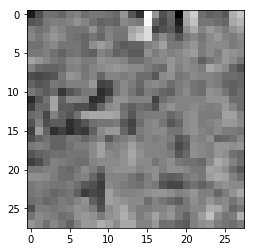

In [346]:
plt.imshow(image, cmap='gray')

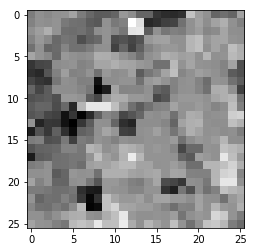

In [347]:
plt.imshow(feature_map, cmap='gray')

In [348]:
a, b = 15, 19
feature_map.shape

(26, 26)

In [349]:
feature_map[a:b, a:b]

array([[81.47403601, 81.47081212, 81.8868    , 80.14313757],
       [81.75419169, 81.54997927, 81.0231925 , 78.44451551],
       [81.54997927, 81.54997927, 81.47403601, 79.67028775],
       [81.50815   , 81.54997927, 81.98685   , 81.47403601]])

In [350]:
image[a:b, a:b]

array([[81.66667175, 82.33333588, 82.33333588, 80.33333588],
       [81.66667175, 81.        , 81.66667175, 81.        ],
       [81.66667175, 81.66667175, 81.66667175, 79.66667175],
       [81.66667175, 81.66667175, 81.66667175, 81.        ]])

In [242]:
import numpy as np

# pn = np.array([[2,3,5],[7,11,13],[17,19,23]])
def c(m):
#     pn = np.array([[10, 100, 1_000],[10_000, 100_000, 1_000_000],[10_000_000, 100_000_000, 1_000_000_000]], dtype=np.int64)
    pn = np.array([[2, 3, 11],[5, 7, 17],[13, 19, 23]], dtype=np.int64)
    v = m*pn
    return np.sum(v)

n = 10
s = 256//n
for i in range(0, 256, s):
    m = np.full((3,3), i)
    z = c(m)
    print('{:>3} {:>12}'.format(i, z))

  0            0
 25         2500
 50         5000
 75         7500
100        10000
125        12500
150        15000
175        17500
200        20000
225        22500
250        25000


In [244]:
m1 = np.array([[0,0,0],[0,0,0],[0,0,1]])
m2 = np.array([[0,0,0],[0,0,1],[0,0,0]])
m3 = np.array([[0,0,0],[0,0,0],[0,1,0]])
m4 = np.array([[0,0,0],[0,0,1],[0,0,1]])
m5 = np.array([[0,0,0],[0,0,0],[0,1,1]])
m6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
m7 = np.array([[0,0,0],[0,0,1],[0,1,1]])

for k in [m1,m2,m3,m4,m5,m6,m7]:
    z = c(k)
    print('{:>3} {:>12} {:>12}'.format(i, z, np.linalg.det(k)))

250           23          0.0
250           17          0.0
250           19          0.0
250           40          0.0
250           42          0.0
250           36          0.0
250           59          0.0


In [239]:
print('{:>3} {:>12}'.format(i, c(np.array([[0,0,0],[0,0,0],[0,0,1]]))))

250   2000000000
